## Face Recognition

#### Note : SVMs are least effective when applied to data that are noisy and contain overlapping points. The algorithm struggles to draw hyperplanes without a high misclassification rate.

In [22]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
faces.target_names, faces.images.shape

(array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
        'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
        'Tony Blair'], dtype='<U17'), (1348, 62, 47))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

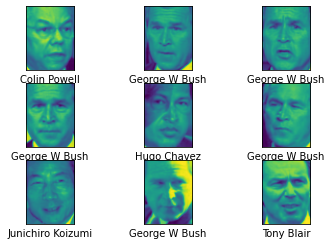

In [24]:
fig, ax = plt.subplots(3,3)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i])
  axi.set(xlabel=faces.target_names[faces.target[i]] , xticks=[], yticks=[])

In [0]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state=101)

In [0]:
y_pred = svc.fit(X_train, y_train).predict(X_test)

In [28]:
from sklearn.metrics import classification_report
import pandas as pd
report = classification_report(y_test, y_pred, output_dict=True, target_names=faces.target_names)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
Ariel Sharon,0.842105,0.761905,0.800000,21.000000
Colin Powell,0.695652,0.842105,0.761905,57.000000
Donald Rumsfeld,0.809524,0.607143,0.693878,28.000000
George W Bush,0.889831,0.813953,0.850202,129.000000
Gerhard Schroeder,0.534884,0.741935,0.621622,31.000000
Hugo Chavez,0.692308,0.600000,0.642857,15.000000
Junichiro Koizumi,0.846154,0.687500,0.758621,16.000000
Tony Blair,0.707317,0.725000,0.716049,40.000000
accuracy,0.765579,0.765579,0.765579,0.765579
macro avg,0.752222,0.722443,0.730642,337.000000
